Jupter Data Science Workflow

From exploratory analysis to reproducible science


Yashas Shivamurthy

IITM,Pune

In [1]:
URL1= 'https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k'

In [2]:
URL= 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessTpe=DOWNLOAD'

In [3]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x10f6b40c7f0>)

In [4]:
!head Fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,13,4,9
10/03/2012 01:00:00 AM,10,4,6
10/03/2012 02:00:00 AM,2,1,1
10/03/2012 03:00:00 AM,5,2,3
10/03/2012 04:00:00 AM,7,6,1
10/03/2012 05:00:00 AM,31,21,10
10/03/2012 06:00:00 AM,155,105,50
10/03/2012 07:00:00 AM,352,257,95
10/03/2012 08:00:00 AM,437,291,146


      1 [main] head 27948 find_fast_cwd: WARNING: Couldn't compute FAST_CWD pointer.  Please report this problem to
the public mailing list cygwin@cygwin.com


In [5]:
import pandas as pd
data=pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()
data.columns = ['Total','East','West']

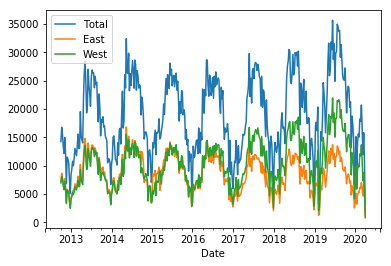

In [6]:
%matplotlib inline

data.resample('W').sum().plot();

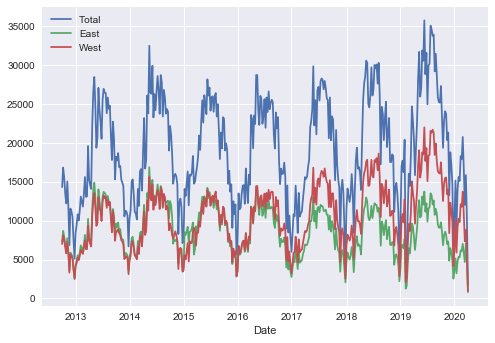

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
 
data.resample('W').sum().plot();


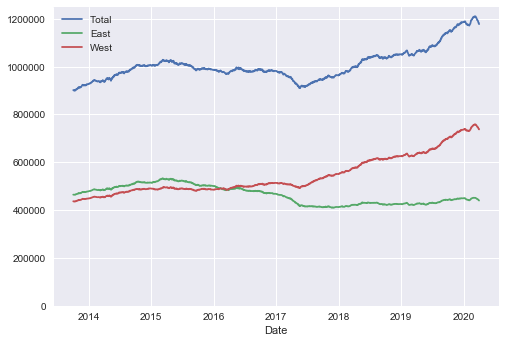

In [8]:
#data['Total']=data['West']+data['East']
ax=data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

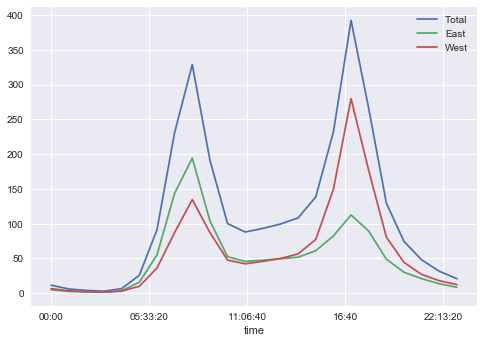

In [9]:
data.groupby(data.index.time).mean().plot();

In [10]:
pivoted= data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


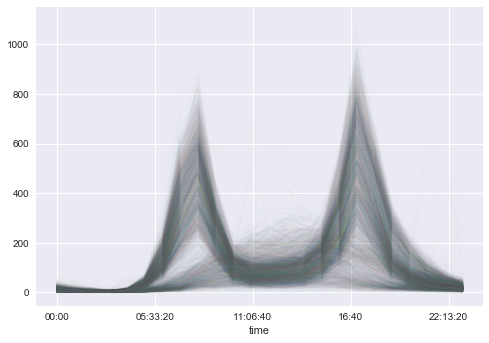

In [11]:
pivoted.plot(legend=False,alpha=0.01);